# Visualizations in Data

Data visualization is the presentation of data in graphical format. Data visualization is both an art and a science as it combines creating visualizations that are both engaging and accurate. In matheimatical applications visualizations can help you better observe trends and patterns in data, or discribe large datasets in a concise way. In this lesson we will focus on some of the most common graphs used to visualize data and describe some tools in Python that can help you create these visualizations!

## Matplotlib
To create our visulizations in Python we will be using the matplotlib library, which will give us the tools to easily create graphs and customiza them. We will cover some of the matplotlib functionality in this lesson, but check out [this resource](https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39) if you want some more introduction to how to use this library.

## Dataset
In this lesson we will be using the drinks file from the [Starbucks nutrition dataset](https://www.kaggle.com/starbucks/starbucks-menu). This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information for drinks are for a 12oz serving size.

## Using and storing data
Data is often stored in comma separated value files or .csv files. For many interesting datasets to try in your projects check out [Kaggle](https://www.kaggle.com/). In this lesson we will be using the starbucks drinks csv file as the basis for our visualizations. In python there is a library called csv that makes handling csv files easier. Take a look at the example below to learn more about how to use this library. 

In [6]:
import csv #the csv library
with open('starbucks_drinkMenu_expanded.csv') as csvfile: #open the file
    #creates a csv reader object which stores the lines of the files in lists and lets us iterate over them
    drinksreader = csv.reader(csvfile) 
    headers = next(drinksreader, None) #skip over the headers
    for row in drinksreader:
        print(row)#take a look at what is being printed out

'40', '10', '15%', '10%', '35%', '4%', '55']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', 'Soymilk', '230', '4.5', '0.5', '0', '0', '110', '36', '2', '33', '9', '10%', '10%', '35%', '15%', '55']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', 'Grande Nonfat Milk', '290', '0.5', '0.2', '0', '10', '160', '57', '1', '56', '14', '25%', '15%', '45%', '4%', '80']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', '2% Milk', '350', '8', '4', '0.2', '30', '180', '57', '1', '55', '14', '20%', '15%', '45%', '4%', '80']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', 'Soymilk', '310', '6', '1', '0', '0', '140', '50', '3', '46', '11', '15%', '15%', '45%', '25%', '80']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', 'Venti Nonfat Milk', '370', '0.5', '0.3', '0', '10', '200', '73', '2', '71', '18', '30%', '20%', '60%', '6%', '110']
['Tazo® Tea Drinks', 'Tazo® Green Tea Latte', '2% Milk', '450', '10', '5', '0.3', '40', '230', '72', '2', '71', '17', '25%', '20%', '50%', '6%', '110']
['Tazo® Tea Drinks', 'Tazo® 

## Bar Chart

Let's start by creating a visualization that you might already be familiar with: a bar chart. Bar charts are used to show comparisons between categories of data. A bar chart will have two axis, one will typically be numerical values while the other will be some sort of category. There are two types of bar charts: vertical and horizontal. Let's looks at some examples of how to create a bar chart using our dataset!

In this example let's compare the sugar content of different types of drinks (lattes, mochas, and teas) using our dataset. Here are the steps we are going to perform to create this visualization: 

1. Read in the data
2. Extract the headers 
3. Find the index which corresponds to the beverage category and grams of sugar 
4. Filter for the types of drinks we are interested in (lattes, mochas, and teas)
5. Store in a list
6. Average the amount of sugar per type
7. Use matplotlib to build a bar chart

The first axis of our bar chart will be the beverage type, the second will be the the average sugar content in grams. More on bar charts in matplotlib [here](https://pythonspot.com/matplotlib-bar-chart/)

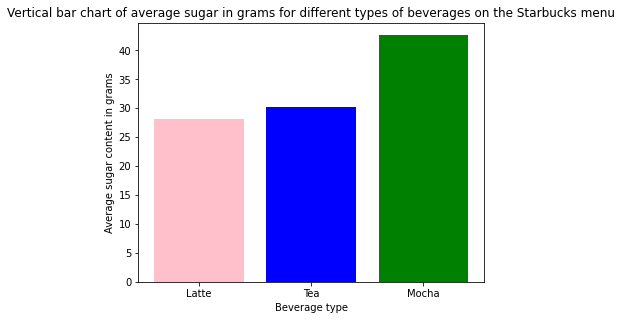

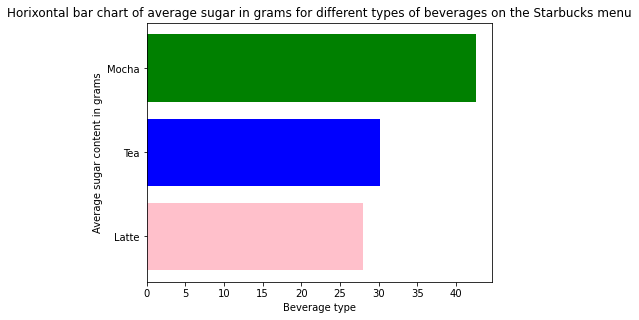

In [7]:
import csv #the csv library
import matplotlib.pyplot as plt #The visualization library
import numpy as np #provides math functions

with open('starbucks_drinkMenu_expanded.csv') as csvfile: #open the file
    #creates a csv reader object which stores the lines of the files in lists and lets us iterate over them
    drinksreader = csv.reader(csvfile) 
    headers = next(drinksreader, None) #skip over the headers
    
    #get the index that corresponds to the information we are interested in
    drink_category_index = headers.index("Beverage")
    sugars_index = headers.index(" Sugars (g)")
    
    #This is where we will store the sugar info for our different beverage types
    sugar_in_lattes = []
    sugar_in_teas = []
    sugar_in_mochas = []
    
    
    for row in drinksreader:
        drink_category = row[drink_category_index]
        sugar_grams = row[sugars_index]
        if 'Latte' in drink_category:
            sugar_in_lattes.append(float(sugar_grams))
        if 'Tea' in drink_category:
            sugar_in_teas.append(float(sugar_grams))
        if 'Mocha' in drink_category:
            sugar_in_mochas.append(float(sugar_grams))
        
    
    beverage_categories = ["Latte", 'Tea', 'Mocha']
    #average the sugar content
    average_sugar_in_lattes = np.mean(sugar_in_lattes)
    average_sugar_in_teas = np.mean(sugar_in_teas)
    average_sugar_in_mochas = np.mean(sugar_in_mochas)
    
    average_sugars = [average_sugar_in_lattes, average_sugar_in_teas, average_sugar_in_mochas]
    
    vertical_bar_chart_figure = plt.figure() #The outer container 
    vertical_bar_chart_axes = vertical_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the bar() method
    #The color argument lets us specify a list of colors for each of the bars
    vertical_bar_chart_axes.bar(beverage_categories, average_sugars, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    vertical_bar_chart_axes.set_title('Vertical bar chart of average sugar in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    vertical_bar_chart_axes.set_ylabel('Average sugar content in grams')
    vertical_bar_chart_axes.set_xlabel('Beverage type')
    
    #How would we create a horizontal bar chart? Use the barh() method!
    
    horizontal_bar_chart_figure = plt.figure() #The outer container 
    horizontal_bar_chart_axes = horizontal_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the barh() method
    #The color argument lets us specify a list of colors for each of the bars
    horizontal_bar_chart_axes.barh(beverage_categories, average_sugars, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    horizontal_bar_chart_axes.set_title('Horixontal bar chart of average sugar in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    horizontal_bar_chart_axes.set_ylabel('Average sugar content in grams')
    horizontal_bar_chart_axes.set_xlabel('Beverage type')
    
    
    
    
  

    
            
    
    
    

## Class Dicussion: what do these bar charts show you? Were you surprised by the results?

# Line Graph

Line graphs are a type of graph where each data point is connected by lines. This can help us understand how something changes in value. In this next example we will use the data we processed in the bar chart examples to create a line graph using the plot() method.

Text(0.5, 0, 'Beverage type')

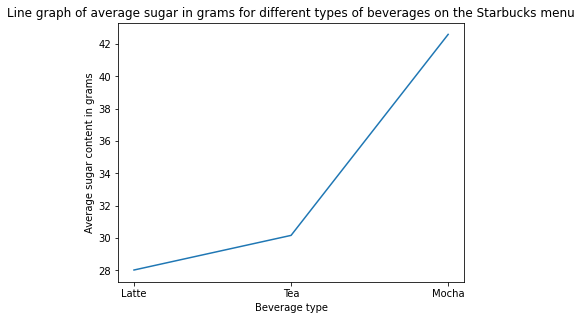

In [8]:
    line_graph_figure = plt.figure() #The outer container 
    line_graph_axes = line_graph_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the line graph using the plot() method
    line_graph_axes.plot(beverage_categories, average_sugars)
    
    #Let's customize our chart!
    
    #Give it a title
    line_graph_axes.set_title('Line graph of average sugar in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    line_graph_axes.set_ylabel('Average sugar content in grams')
    line_graph_axes.set_xlabel('Beverage type')

## Activity: make a bar chart and line graph for the average protein in grams for Cappuccinos, Macchiatos, and Smoothies

0      False
1      False
2      False
3      False
4      False
       ...  
237    False
238    False
239    False
240    False
241    False
Name: Beverage, Length: 242, dtype: bool


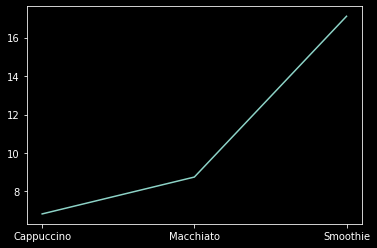

In [54]:
import pandas as pd

df = pd.read_csv("starbucks_drinkMenu_expanded.csv")

protein_cappucinos = df.loc[df['Beverage'] == "Cappuccino"][' Protein (g) ']
protein_macchiatos = df.loc[df['Beverage'].str.contains("Macchiato")][' Protein (g) ']
protein_smoothies = df.loc[df['Beverage'].str.contains("Smoothie")][' Protein (g) ']

beverage_categories = ["Cappuccino", 'Macchiato', 'Smoothie']
average_protein = [protein_cappucinos.mean(), protein_macchiatos.mean(), protein_smoothies.mean()]

plt.style.use('dark_background')
plt.plot(beverage_categories, average_protein)
plt.show()



## Histogram

Histograms are similar to bar charts, but a histogram groups numbers into ranges. The x axis of a histogram typically shows the the value ranges and the y axis corresponds to the number of items in each range. Histograms help us better visulize and understand the distribution of the data for certain values. 

If you have continuous numerical data, in order to group the data into ranges you need to split the data into intervals, as known as bins. Let's look at an example by creating histograms for the sugar content of each type starbucks beverage.

You might be wondering how do we decided how many bins to use? This is [an interesting topic](https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram) and there are many ways to choose the bin number. For this class we don't need to worry too much about that and can just try out some different options and choose which one helps us visualize the data best. 


Text(0.5, 0, 'Sugar in grams')

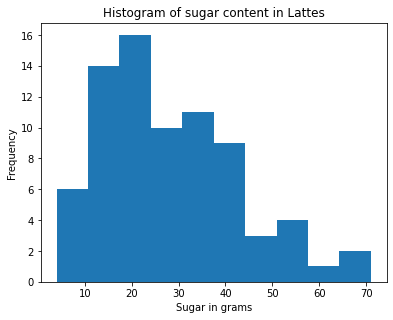

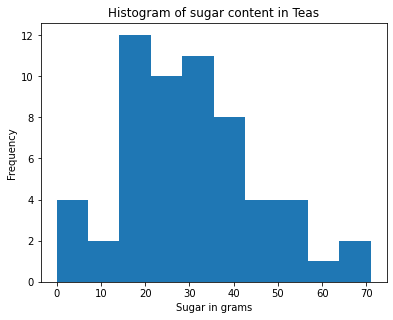

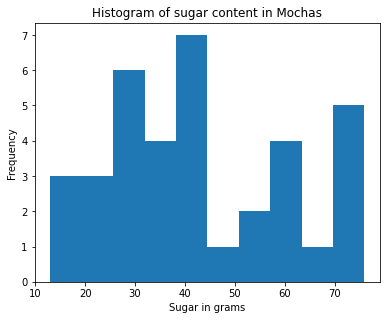

In [10]:
#recall that  sugar_in_lattes, sugar_in_teas, and sugar_in_mochas are all lists that store the sugar in grams data
#We will create histograms that help us better see the sugar content distributions for each type of beverage

number_of_bins = 10

latte_histogram_figure = plt.figure()
latte_histogram_axes = latte_histogram_figure.add_axes([0.1, 0.2, 0.8, 0.9])

latte_histogram_axes.hist(sugar_in_lattes, bins=number_of_bins)

latte_histogram_axes.set_title('Histogram of sugar content in Lattes')
latte_histogram_axes.set_ylabel('Frequency')
latte_histogram_axes.set_xlabel('Sugar in grams')

tea_histogram_figure = plt.figure()
tea_histogram_axes = tea_histogram_figure.add_axes([0.1, 0.2, 0.8, 0.9])

tea_histogram_axes.hist(sugar_in_teas, bins=number_of_bins)

tea_histogram_axes.set_title('Histogram of sugar content in Teas')
tea_histogram_axes.set_ylabel('Frequency')
tea_histogram_axes.set_xlabel('Sugar in grams')

mocha_histogram_figure = plt.figure()
mocha_histogram_axes = mocha_histogram_figure.add_axes([0.1, 0.2, 0.8, 0.9])

mocha_histogram_axes.hist(sugar_in_mochas, bins=number_of_bins)

mocha_histogram_axes.set_title('Histogram of sugar content in Mochas')
mocha_histogram_axes.set_ylabel('Frequency')
mocha_histogram_axes.set_xlabel('Sugar in grams')



In [ ]:
## Class Dicussion: What observations about the data can you make with these histograms?

## Activity: Create a histogram of the protein content in two different beverages of your choice!

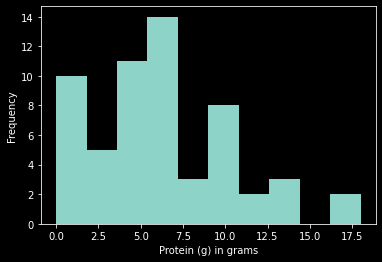

In [67]:
protein_tea = df.loc[df['Beverage'].str.contains("Tea")][' Protein (g) ']

plt.hist(protein_tea, bins=10)
# plt.set_ylabel('Frequency')
plt.ylabel('Frequency')
plt.xlabel('Protein (g) in grams')
plt.show()